In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from tensorflow.python.keras import utils
from keras.models import Sequential
from keras.layers import Dense,Flatten,InputLayer,Dropout
import keras
import imageio
from PIL import Image
from keras.callbacks import TensorBoard

C:\Users\user\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
train=pd.read_csv('agedetectiontrain/train.csv')
test=pd.read_csv('agedetectiontest/test.csv')

In [3]:
temp=[]
for img_name in train.ID:
    img_path=os.path.join('agedetectiontrain/Train',img_name)
    img=imageio.imread(img_path)
    img=np.array(Image.fromarray(img).resize((32,32))).astype('float32')
    temp.append(img)
    
train_x=np.stack(temp)

In [4]:
temp=[]
for img_name in test.ID:
    img_path=os.path.join('agedetectiontest/Test',img_name)
    img=imageio.imread(img_path)
    img=np.array(Image.fromarray(img).resize((32,32))).astype('float32')
    temp.append(img)
       
test_x=np.stack(temp)

In [5]:
train_x=train_x/255.
test_x=test_x/255.

In [6]:
from keras.utils import to_categorical
lb=LabelEncoder()
train_y=lb.fit_transform(train.Class)
train_y=to_categorical(train_y)

In [7]:
from clr_callback.clr_callback import CyclicLR
# Specifying all the parameters we will be using in our network
input_num_units = (32, 32, 3)
hidden_num_units = 500
output_num_units = 3

# Optimum values
optimizer = keras.optimizers.Adam()
activation = 'relu'
cb_triangular_lr=CyclicLR(base_lr=0.0001,max_lr=0.001,step_size=2000.,mode='triangular2')
weights=keras.initializers.he_normal()
bias=keras.initializers.Constant(value=0.01)
dropout=0.30
regularizer=keras.regularizers.l2()
epochs=100
batch_size=128

In [8]:
import warnings
warnings.filterwarnings('ignore')
model=Sequential([
    InputLayer(input_shape=input_num_units),
    Flatten(),
    Dense(units=hidden_num_units,kernel_initializer=weights,
          bias_initializer=bias, activation=activation,
          kernel_constraint=keras.constraints.max_norm(3),
          kernel_regularizer=regularizer),
    Dropout(dropout),
    Dense(units=output_num_units,kernel_initializer=weights,activation='softmax'),
])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 500)               1536500   
                                                                 
 dropout (Dropout)           (None, 500)               0         
                                                                 
 dense_1 (Dense)             (None, 3)                 1503      
                                                                 
Total params: 1538003 (5.87 MB)
Trainable params: 1538003 (5.87 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [10]:
model.compile(optimizer=optimizer,loss='categorical_crossentropy',
             metrics=['accuracy'])
cb_save=keras.callbacks.TensorBoard(log_dir='optimum_model',write_graph=False)
model.fit(train_x,train_y,batch_size=batch_size,epochs=epochs,verbose=1,
         validation_split=0.2,callbacks=[cb_triangular_lr,cb_save])

Epoch 1/100


125/125 [==============================] - 7s 39ms/step - loss: 9.0497 - accuracy: 0.5648 - val_loss: 6.9729 - val_accuracy: 0.6138
Epoch 2/100
125/125 [==============================] - 5s 37ms/step - loss: 5.3928 - accuracy: 0.6064 - val_loss: 3.9736 - val_accuracy: 0.6273
Epoch 3/100
125/125 [==============================] - 5s 38ms/step - loss: 3.1076 - accuracy: 0.6115 - val_loss: 2.4064 - val_accuracy: 0.5708
Epoch 4/100
125/125 [==============================] - 5s 37ms/step - loss: 1.9362 - accuracy: 0.6020 - val_loss: 1.5480 - val_accuracy: 0.6231
Epoch 5/100
125/125 [==============================] - 5s 37ms/step - loss: 1.3552 - accuracy: 0.6086 - val_loss: 1.1865 - val_accuracy: 0.6160
Epoch 6/100
125/125 [==============================] - 5s 37ms/step - loss: 1.0929 - accuracy: 0.6064 - val_loss: 0.9977 - val_accuracy: 0.6208
Epoch 7/100
125/125 [==============================] - 5s 38ms/step - loss: 0.9727 - accuracy: 0.6094 - val_loss: 0.9141 - val_accurac

125/125 [==============================] - 5s 37ms/step - loss: 0.8419 - accuracy: 0.6216 - val_loss: 0.8076 - val_accuracy: 0.6419
Epoch 55/100
125/125 [==============================] - 5s 38ms/step - loss: 0.8422 - accuracy: 0.6236 - val_loss: 0.8107 - val_accuracy: 0.6467
Epoch 56/100
125/125 [==============================] - 5s 37ms/step - loss: 0.8381 - accuracy: 0.6255 - val_loss: 0.7997 - val_accuracy: 0.6464
Epoch 57/100
125/125 [==============================] - 5s 37ms/step - loss: 0.8406 - accuracy: 0.6199 - val_loss: 0.8481 - val_accuracy: 0.5987
Epoch 58/100
125/125 [==============================] - 5s 36ms/step - loss: 0.8374 - accuracy: 0.6248 - val_loss: 0.8223 - val_accuracy: 0.6454
Epoch 59/100
125/125 [==============================] - 5s 37ms/step - loss: 0.8318 - accuracy: 0.6281 - val_loss: 0.8000 - val_accuracy: 0.6479
Epoch 60/100
125/125 [==============================] - 5s 37ms/step - loss: 0.8279 - accuracy: 0.6259 - val_loss: 0.8024 - val_accuracy: 0.641

In [11]:
# Saving the model
model.save('optimum_model.h5')
# Loading the model
from keras.models import load_model
model = load_model('optimum_model.h5')


In [12]:
pred=np.argmax(model.predict(test_x),axis=-1)
pred=lb.inverse_transform(pred)
test['Class']=pred
test.to_csv('out.csv',index=False)

208/208 [==============================] - 1s 5ms/step


208/208 [==============================] - 1s 5ms/step
Original: MIDDLE Predicted: MIDDLE


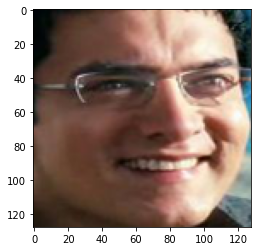

In [14]:
# Visual Inspection of predictions
idx = 2481
img_name = test.ID[idx]

img = imageio.imread(os.path.join('agedetectiontest/Test', img_name))
plt.imshow(np.array(Image.fromarray(img).resize((128, 128))))
pred = np.argmax(model.predict(test_x),axis=-1)
print('Original:', train.Class[idx], 'Predicted:', lb.inverse_transform(pred)[idx])